In [333]:
%matplotlib inline
import csv
import ast
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

def getKey(item):
    return item[1]

In [334]:
cat_attributes = """'MS Zoning' 'Street' 'Lot Shape' 'Land Contour' 'Utilities' 'Lot Config' 'Neighborhood' 'Condition 2' 'Bldg Type' 'House Style' 'Roof Style' 'Exterior 1st' 'Exterior 2nd' 'Mas Vnr Type' 'Exter Qual' 'Foundation' 'Bsmt Qual' 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'Heating QC' 'Central Air' 'Kitchen Qual' 'Functional' 'Garage Type' 'Garage Finish' 'Garage Qual' 'Garage Cond' 'Paved Drive' 'Sale Type' 'Sale Condition'"""

cat_attributes = cat_attributes.split("' '")
cat_attributes[0] = 'MS Zoning'
cat_attributes[-1] = 'Sale Condition'
print(len(cat_attributes))
test = [[[143, 191283.25164980203], [142, 134705.15384615384], [59, 218986.94964028776], [144, 126898.49676025918], [34, 77229.84615384616], [87, 80312.5], [10, 81500.0]], [[135, 181100.9239204935], [82, 106663.33333333333]], [[89, 210925.34831460673], [150, 162580.45185583647], [90, 229588.3552631579], [91, 221922.8125]]]
test[0].sort(key=getKey)
print(test[0])


31
[[34, 77229.84615384616], [87, 80312.5], [10, 81500.0], [144, 126898.49676025918], [142, 134705.15384615384], [143, 191283.25164980203], [59, 218986.94964028776]]


In [335]:
categories = ['', '1.5Fin', '1.5Unf', '1Fam', '1Story', '2.5Fin', '2.5Unf', '2Story', '2Types', '2fmCon', 'A (agr)', 'ALQ', 'Abnorml', 'AdjLand', 'AllPub', 'Alloca', 'Artery', 'AsbShng', 'AsphShn', 'Attchd', 'Av', 'BLQ', 'Basment', 'Blmngtn', 'Blueste', 'Bnk', 'BrDale', 'Brk Cmn', 'BrkCmn', 'BrkComm', 'BrkFace', 'BrkSide', 'BrkTil', 'BuiltIn', 'C (all)', 'CBlock', 'COD', 'CWD', 'CarPort', 'CemntBd', 'ClearCr', 'ClyTile', 'CmentBd', 'CollgCr', 'CompShg', 'Con', 'ConLD', 'ConLI', 'ConLw', 'Corner', 'Crawfor', 'CulDSac', 'Detchd', 'Duplex', 'Edwards', 'Elev', 'Ex', 'FR2', 'FR3', 'FV', 'Fa', 'Family', 'Feedr', 'Fin', 'Flat', 'Floor', 'FuseA', 'FuseF', 'FuseP', 'GLQ', 'Gable', 'Gambrel', 'Gar2', 'GasA', 'GasW', 'Gd', 'GdPrv', 'GdWo', 'Gilbert', 'Grav', 'Greens', 'GrnHill', 'Grvl', 'Gtl', 'HLS', 'HdBoard', 'Hip', 'I (all)', 'IDOTRR', 'IR1', 'IR2', 'IR3', 'ImStucc', 'Inside', 'Landmrk', 'Low', 'Lvl', 'LwQ', 'Maj1', 'Maj2', 'Mansard', 'MeadowV', 'Membran', 'Metal', 'MetalSd', 'Min1', 'Min2', 'Mitchel', 'Mix', 'Mn', 'MnPrv', 'MnWw', 'Mod', 'N', 'NA', 'NAmes', 'NPkVill', 'NWAmes', 'New', 'No', 'NoRidge', 'NoSeWa', 'NoSewr', 'None', 'Norm', 'Normal', 'NridgHt', 'OldTown', 'Oth', 'OthW', 'Other', 'Othr', 'P', 'PConc', 'Partial', 'Pave', 'Plywood', 'Po', 'PosA', 'PosN', 'PreCast', 'RFn', 'RH', 'RL', 'RM', 'RRAe', 'RRAn', 'RRNe', 'RRNn', 'Rec', 'Reg', 'Roll', 'SBrkr', 'SFoyer', 'SLvl', 'SWISU', 'Sal', 'Sawyer', 'SawyerW', 'Sev', 'Shed', 'Slab', 'Somerst', 'Stone', 'StoneBr', 'Stucco', 'TA', 'Tar&Grv', 'TenC', 'Timber', 'Twnhs', 'TwnhsE', 'Typ', 'Unf', 'VWD', 'Veenker', 'VinylSd', 'WD ', 'Wall', 'Wd Sdng', 'Wd Shng', 'WdShake', 'WdShing', 'WdShngl', 'Wood', 'Y']

print(categories.index('RL'))

with open("AmesHousingCopy.csv") as f:
    reader = csv.reader(f,delimiter=",")
    
    X = []
    y = []
    headings = []
    
    for i, row in enumerate(reader):
        if i==0:
            headings.append(row)
            continue
        y.append(float(row[-1])) #Append the Sale Price from each row to y
        X.append([])
        for item in row[:-1]:
            try:
                if isinstance(ast.literal_eval(item), int): #for each item, append it to the respective row
                    X[i-1].append(int(item))                #if it is a numerical value, or append the corresponding
                else:                                       #integer value if it is a categorical value
                    X[i-1].append(categories.index(item))
            except ValueError:                              #Exceptions deal with ast.literal_eval quirks
                X[i-1].append(categories.index(item))
            except SyntaxError:
                X[i-1].append(categories.index(item))
            
print("X shape:", np.shape(np.array(X)), "Y shape:", np.shape(np.array(y)))
print(headings)
print(X[1])

     

143
X shape: (2930, 65) Y shape: (2930,)
[['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Neighborhood', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type', 

In [336]:
att_pairs = []
for i,column in enumerate(cat_attributes):
    att_pairs.append([])
    index = headings[0].index(column)
    for j,row in enumerate(X):
        temp = [row[index]]
        temp.append(y[j])
        att_pairs[i].append(temp)
        
print(np.shape(np.array(att_pairs)))

#print(np.array(att_pairs))
    #get the index of the column in headings
    #go through X and create a list of list containing pairs of category integer and sale price
#Sample from data
#print(X[1])
#create a list containing the category from each attribute, along with the average price
att_avgs = []
for k,column in enumerate(att_pairs):
    att_avgs.append([])
    for m,row in enumerate(column):
       
        if m == 0:
            att_avgs[k].append(row + [1])
            continue
        test = False
        for l,entry in enumerate(att_avgs[k]):
            if row[0] in entry:
                test = True
                index = l
        if test == False:
            temp = row
            temp.append(1)
            att_avgs[k].append(temp)
        else:
            att_avgs[k][index][1] += row[1]
            att_avgs[k][index][2] += 1
        

print(np.shape(np.array(att_avgs)))       

(31, 2930, 2)
(31,)


In [337]:
#print(np.array(att_avgs[:5]))
cat_total = []
for b, column in enumerate(att_avgs):
    cat_total.append([])
    for row in column:
        cat_total[b].append([row[0]] + [row[1] / row[2]] + [row[2]])
        
print(np.array(cat_total[:3]))


[ [[143, 191283.25164980203, 2273], [142, 134705.15384615384, 26], [59, 218986.94964028776, 139], [144, 126898.49676025918, 463], [34, 77229.84615384616, 26], [87, 80312.5, 2], [10, 81500.0, 1]]
 [[135, 181100.9239204935, 2918], [82, 106663.33333333333, 12]]
 [[89, 210925.34831460673, 979], [150, 162580.45185583647, 1859], [90, 229588.3552631579, 76], [91, 221922.8125, 16]]]


Sale Condition
['AdjLand', 'Abnorml', 'Family', 'Alloca', 'Normal', 'Partial']
[108730, 140777, 157488, 164169, 175607, 273183]
[13, 190, 46, 25, 2412, 244]


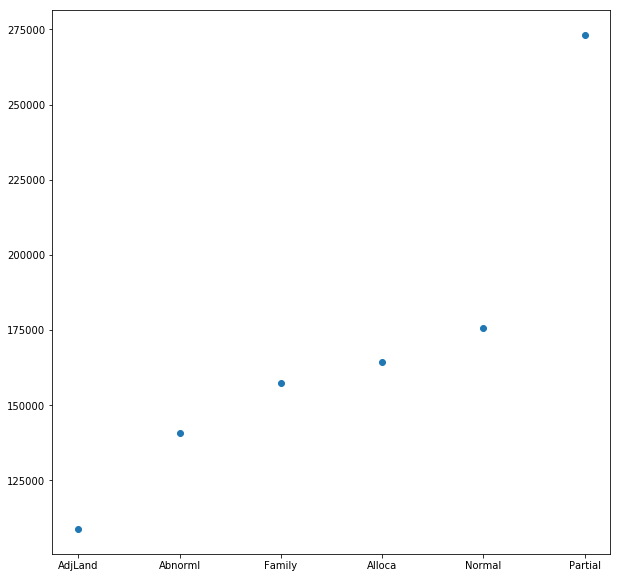

In [339]:
names = []
data = []
counts = []

#print(cat_total[0])
plt.figure(figsize=(10,10))
num = 30 
cat_total[num].sort(key=getKey)
for row in cat_total[num]:
    
    names.append(categories[row[0]])
    data.append(int(row[1]))
    counts.append(row[2])
        
xval = range(len(data))
print(cat_attributes[num])
print(names)
print(data)
print(counts)
plt.scatter(xval, data)
plt.xticks(xval, names)
plt.show()

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

print(regressor.get_params())
print()
print("Score: ", regressor.score(X_test, y_test))
print()
print("Sample predictions: ", regressor.predict(X[:6]))
print()
evals = cross_val_score(regressor, X_test, y_test, cv=10)
print(len(evals), "- fold eval scores: \n",  "\n\n", "Average validation score: ",(sum(evals)/len(evals)))

{'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Score:  0.75480229022

Sample predictions:  [ 215000.  105000.  172000.  244000.  189900.  195500.]

10 - fold eval scores: 
 

 Average validation score:  0.719777327952


After doing very simple cleaning of the data, and not accounting for any missing data, the DecisionTreeRegression shows a score of approximately 65% accuracy (it changes each time I run it) when evaluating using 10-fold cross validation, and a 80-20 train-test split.

I think this can be improved by removing attributes that are missing a large percentage of data and maybe any attributes that aren't very useful.